# Convolutional Neural Networks

<img src="https://img.devrant.com/devrant/rant/r_1376371_EWibJ.jpg">

# History

<img src="https://scontent-sjc3-1.xx.fbcdn.net/v/t31.0-8/29663160_350326788794741_8613174572759534028_o.jpg?_nc_cat=102&_nc_oc=AQnMDomqk7LnXiW07nlDP3RLJTdr0M5jgOnTHBBo2OPkRMBUlIkqebI24ciImm7GvPm2hFq6y4MD1Q1WzusrZ1vR&_nc_ht=scontent-sjc3-1.xx&oh=d119e4b5db06bf6a5ebfc0bdaca45c18&oe=5DA5819C" width=800>

# Hubel and Wiesel 

<img src="https://static1.squarespace.com/static/5c28a79ca9e0286061906e43/t/5c538d7ee5e5f0059e4fcba7/1549328072148/hubel-experiment.jpg" width=500>

* 1959 Receptive fields of single neurons in the cat's striate cortex
* 1962 Receptive fields, binocular interaction and functional architecutre in cat's visual cortex

# Neocognitron


<img src="https://www.researchgate.net/profile/Tugba_Erkoc/publication/323354835/figure/fig1/AS:601624254877707@1520449808379/The-structure-of-Neocognitron-16.png">

[Fukushima 1980]

* Hierarchical architecture
* Alternating between simple and complex cells

# Backpropagation


<img src="https://slideplayer.com/slide/775779/3/images/46/Back-propagation+of+error.jpg" width=600>

[[Rumelhart 1986]](https://web.stanford.edu/class/psych209a/ReadingsByDate/02_06/PDPVolIChapter8.pdf)

# The First Convolutional Neural Network

<img src="https://miro.medium.com/max/2625/1*1TI1aGBZ4dybR6__DI9dzA.png">

[LeCun, Bottou, Bengio, Haffner 1998]

# ImageNet Classification with Deep Convolutional Neural Networks

<img src="https://miro.medium.com/max/1838/1*qyc21qM0oxWEuRaj-XJKcw.png">

[Krizhevsky, Sutskever, Hinton, 2012]

<img src="https://github.com/jordanott/DeepLearning/blob/master/Figures/imagenet_results.png?raw=true" width=600>

(Fei-Fei Li & Justin Johnson & Serena Yeung, 2018)

<img src="https://github.com/jordanott/DeepLearning/blob/master/Figures/imagenet_networks.png?raw=true" width=600>

(Fei-Fei Li & Justin Johnson & Serena Yeung, 2018)

# Image Classification
![](https://adeshpande3.github.io/assets/Cover.png)

# Image Segmentation
![](https://cdn-images-1.medium.com/max/1600/1*hf6J8vsX7gmHhZnbPa4y9g.png)

# Object Localization
![](https://cdn-images-1.medium.com/max/1200/1*dl42dsy6JIsUe9MilzL8NQ.jpeg)

# Self Driving Cars
[![](https://cdn0.vox-cdn.com/thumbor/DQO2LEJimhQ72ZHWA-EVA7vBVhs=/cdn2.vox-cdn.com/uploads/chorus_asset/file/7536511/ALVINN_screengrab.png)](https://www.youtube.com/watch?v=ilP4aPDTBPE)

# Video Games
![](https://skymind.ai/images/wiki/conv_agent.png)

![](https://cdn-images-1.medium.com/max/1200/1*HNNByk8nAduVThhOVZtddg.jpeg)

## What happens if we use this for images? 
![](https://github.com/jordanott/CNN-Lecture/raw/de1b8c4047b3e3ae41b1a863cf306187578a9d59/Images/deep.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def flatten_image():
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.imshow(x_train[0])
    plt.xticks([]); plt.yticks([])
    plt.title('28x28 Image')
    plt.subplot(1,2,2)
    plt.imshow(x_train[0].reshape(1,-1)[:,::10])
    plt.xticks([]); plt.yticks([])
    plt.title('1x784 Vector')
    plt.show()

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Images have spatial information

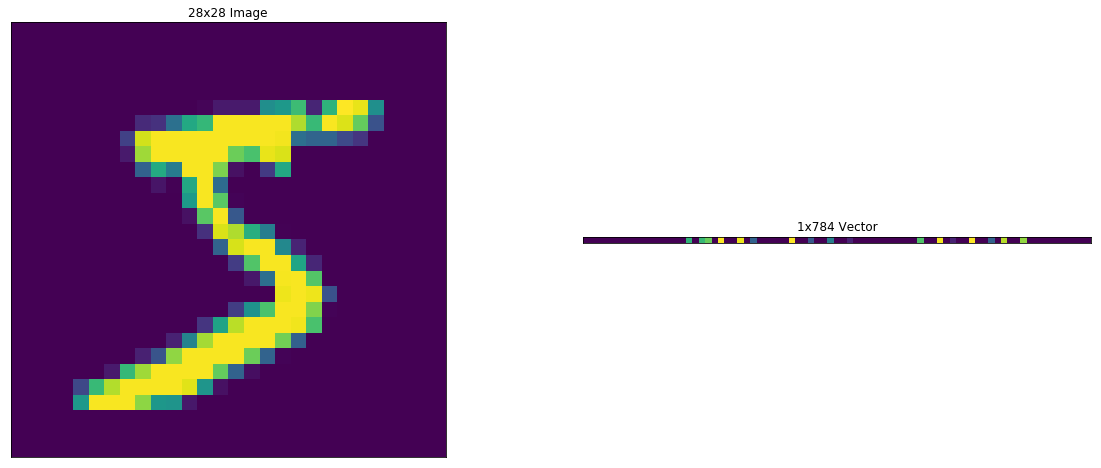

In [2]:
flatten_image()

# Animation
![](https://cdn-images-1.medium.com/max/1600/1*L4T6IXRalWoseBncjRr4wQ@2x.gif)

# Convolution
\begin{align} 
\theta &= \begin{bmatrix}
       \theta_{11} & \theta_{12} & \theta_{13} \\
       \theta_{21} & \theta_{22} & \theta_{23}\\
       \theta_{31} & \theta_{32} & \theta_{33}
     \end{bmatrix} 
     \hspace{20mm}
     X &= \begin{bmatrix}
       X_{11} & ... & X_{1w} \\
       X_{21} & ... & X_{2w}\\
       \vdots & \vdots & \vdots \\
       X_{h1} & ... & X_{hw}
     \end{bmatrix}
\end{align}
* $X$: Image with height, $h$, width, $w$, and depth (color channels; RGB), $d$
* $\theta$: Weight matrix (kernel, filter)

* Slide our weight matrix over $X$ and perform a multiplication at each location

* Refered to as convolving

# Output of Convolution
\begin{align} 
     \begin{bmatrix}
       \theta_{11}X_{11} + ... \theta_{33}X_{33} & ... & \theta_{11}X_{1w-3} + ... \theta_{33}X_{3w} \\
       \vdots & \vdots & \vdots \\
       \theta_{11}X_{h-3,1} + ... \theta_{33}X_{h3} & ... & \theta_{11}X_{h-3w-3} + ... \theta_{33}X_{hw}
     \end{bmatrix}
\end{align}

# Convolution Visualization
![](https://cdn-images-1.medium.com/max/1600/1*EuSjHyyDRPAQUdKCKLTgIQ.png)

<img src="https://github.com/jordanott/CNN-Lecture/raw/de1b8c4047b3e3ae41b1a863cf306187578a9d59/Images/convolution.png" width="650">

# Calculating Output Dimensions

\begin{equation}
    W_O = \frac{(W_I - K + 2P)}{S} + 1
\end{equation}

\begin{equation}
    H_O = \frac{(H_I - K + 2P)}{S} + 1
\end{equation}

\begin{equation}
    D_O = F
\end{equation}

* $W_I, W_O$: width of input and output, respectively
* $K$: dimesnion of filter
* $F$: number of kernels
* $S$: stride amount
* $P$: padding amount
* $D$: volume depth

In [3]:
def calc_conv_output_dim(in_shape, kernel_shape, padding, stride):
    h_out = (in_shape[0] - kernel_shape[0] + 2*padding) / stride + 1
    w_out = (in_shape[1] - kernel_shape[1] + 2*padding) / stride + 1
    d_out = kernel_shape[2]
    
    return (h_out, w_out, d_out)

# Convolution by Hand

In [4]:
# set conv layer params
kernel_size = 3; num_filters = 32; stride = 1; padding = 0
# init weight kernel
w = np.random.randn(kernel_size, kernel_size, num_filters)
# get input
x = x_train[0].reshape(28,28,1)

# calculate output shape
out_shape = calc_conv_output_dim(x.shape, w.shape, padding, stride)
output = np.zeros(shape=out_shape)

for row in range(output.shape[0]): # iterate through image rows
    for col in range(output.shape[1]): # iterate through image cols
        # multiply weights with image
        tmp = w * x[row: row+kernel_size, col: col+kernel_size]
        # sum
        output[row,col] = tmp.sum(axis=0).sum(axis=0)

# Visualize Output Volumes

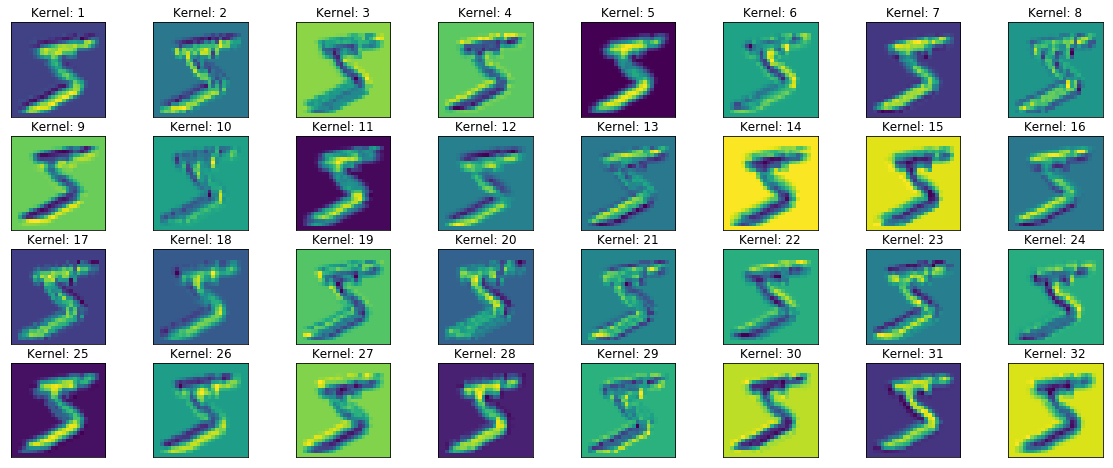

In [5]:
plt.figure(figsize=(20,8))
for i in range(1,33):
    plt.subplot(4,8,i); plt.title('Kernel: %d' %i)
    plt.imshow(output[:,:,i-1]); plt.xticks([]); plt.yticks([])

# Activations

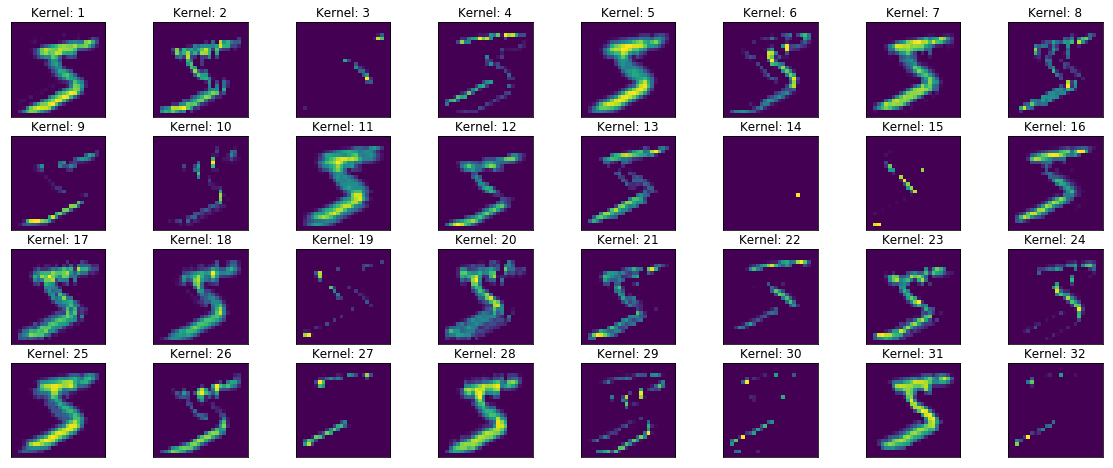

In [6]:
def relu(z): return np.maximum(0,z)
plt.figure(figsize=(20,8))
for i in range(1,33):
    plt.subplot(4,8,i); plt.title('Kernel: %d' %i)
    plt.imshow(relu(output[:,:,i-1])); plt.xticks([]); plt.yticks([])

# Padding
* What happens to the size of our output everytime we do a convolution?

* Add border of zeros to maintain same volume shape

<img src="https://github.com/jordanott/DeepLearning/blob/master/Figures/padding.gif?raw=true" width=600>

# Pooling

![](https://github.com/jordanott/CNN-Lecture/raw/de1b8c4047b3e3ae41b1a863cf306187578a9d59/Images/pooling.png)

* Downsampling
* Reduce number of parameters in network

# Calculating Output Dimensions

\begin{equation}
    W_O = \frac{(W_I - K)}{S} + 1
\end{equation}

\begin{equation}
    H_O = \frac{(H_I - K)}{S} + 1
\end{equation}

\begin{equation}
    D_O = D_I
\end{equation}

* $W_I, W_O$: width of input and output, respectively
* $K$: dimesnion of filter
* $S$: stride amount
* $D$: volume depth

# Flattening

In [7]:
original_shape = output.shape
flattened_shape = output.reshape(1,-1).shape

print 'Original:', original_shape, 'Flattened:', flattened_shape

Original: (26, 26, 32) Flattened: (1, 21632)


# Fully Connected
* Used for classification/regression output
![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/74_blog_image_2.png)

# Complete architecture

![](https://github.com/jordanott/CNN-Lecture/raw/de1b8c4047b3e3ae41b1a863cf306187578a9d59/Images/cnn.jpg)

# CNN Properties
* Weights are shared across space
* Provides basis for translational invariance

# Class Activation Mapping
![](http://ift.tt/2bCVSkt)

# Imports

In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.optimizers import SGD

# Set parameters

In [9]:
# 128 images in each batch
batch_size = 128
# 0-9 numbered images
num_classes = 10
# train for 20 steps
epochs = 5

# Load the data

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<img src="https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067">

# Formatting


In [11]:
# flatten the data
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the data to be between 0 and 1
x_train /= 255.
x_test /= 255.

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60000, 'train samples')
(10000, 'test samples')


# Create the model

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 9,452,394
Trainable params: 9,452,394
Non-trainable params: 0
_________________________________________________________________


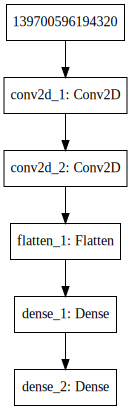

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Training

In [14]:
history = model.fit(
    x_train, y_train,    # training data to learn from 
    batch_size=batch_size, # size of batches
    epochs=epochs, # how many iterations we train for 
    verbose=1, # type of logging
    validation_data=(x_test, y_test)) # validation data to test on

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.5983 - acc: 0.8413 - val_loss: 0.2329 - val_acc: 0.9330
Epoch 2/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.2084 - acc: 0.9392 - val_loss: 0.1543 - val_acc: 0.9568
Epoch 3/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.1511 - acc: 0.9559 - val_loss: 0.1217 - val_acc: 0.9644
Epoch 4/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.1189 - acc: 0.9646 - val_loss: 0.0990 - val_acc: 0.9710
Epoch 5/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.1001 - acc: 0.9699 - val_loss: 0.0882 - val_acc: 0.9733


# Plotting Results

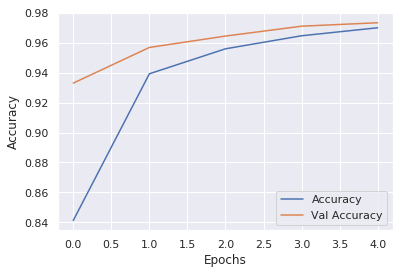

In [18]:
import seaborn as sns; sns.set()
history.history['epochs'] = range(epochs)

sns.lineplot(x='epochs', y='acc', data=history.history, label='Accuracy')
sns.lineplot(x='epochs', y='val_acc', data=history.history, label='Val Accuracy')

plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.show()